In [80]:
import pandas as pd
#read in data using pandas
train_df = pd.read_csv("AQI_Delhi.csv",encoding='cp1252')
test_df = pd.read_csv("AQI_Delhi_Test.csv",encoding='cp1252')
#check data has been read in properly
train_df.tail()

,Date,SO2,NO2,O3,PM2.5,PM10,AT,WD,WS,RH,AQI1,AQI2,AQI3,AQI4,AQI5,DOW,DOM,DOY,MONTH,AQI
1192,15/07/2018,18.73,145.67,32.721887,165.65,375.88,25.19,85.08,0.96,48.53,335.266279,625.371304,528.871633,415.688367,615.547143,7,15,196,7,390.826835
1193,16/07/2018,19.61,135.03,15.914445,112.71,422.68,24.94,97.87,1.96,51.11,390.826835,335.266279,625.371304,528.871633,415.688367,1,16,197,7,830.700408
1194,17/07/2018,24.11,128.26,59.445802,463.68,713.95,23.76,175.26,1.88,49.45,830.700408,390.826835,335.266279,625.371304,528.871633,2,17,198,7,782.881739
1195,18/07/2018,20.35,197.55,84.779065,202.14,697.16,21.77,281.35,0.68,55.88,782.881739,830.700408,390.826835,335.266279,625.371304,3,18,199,7,688.028261
1196,19/07/2018,19.45,67.90,110.579462,238.60,631.05,22.62,284.02,1.14,36.16,688.028261,782.881739,830.700408,390.826835,335.266279,4,19,200,7,872.421837


In [81]:
#create a dataframe with all training data except the target column
train_X = train_df.drop(columns=['AQI','Date'])
test_X = test_df.drop(columns=['AQI','Date'])

#check that the target variable has been removed
train_X.head() 


,SO2,NO2,O3,PM2.5,PM10,AT,WD,WS,RH,AQI1,AQI2,AQI3,AQI4,AQI5,DOW,DOM,DOY,MONTH
0,14.93,79.48,10.17,83.02,482.61,30.16,263.99,1.50,31.26,475.049130,396.315696,326.702405,265.960000,233.431034,5,10,100,4
1,11.17,77.10,13.88,114.30,442.78,29.81,256.34,1.26,36.18,417.901739,475.049130,396.315696,326.702405,265.960000,6,11,101,4
2,28.10,85.62,13.12,251.78,671.70,29.92,160.78,0.97,36.42,746.352174,417.901739,475.049130,396.315696,326.702405,7,12,102,4
3,22.88,61.65,10.91,64.32,161.80,24.30,151.32,1.77,53.08,141.397315,746.352174,417.901739,475.049130,396.315696,1,13,103,4
4,14.95,53.87,15.89,110.57,247.32,24.91,118.04,2.01,58.09,267.807931,141.397315,746.352174,417.901739,475.049130,2,14,104,4


In [82]:
#create a dataframe with only the target column
train_y = train_df[['AQI']]
test_y = test_df[['AQI']]
date = test_df[['Date']]



#view dataframe
train_y.tail()

,AQI
1192,390.826835
1193,830.700408
1194,782.881739
1195,688.028261
1196,872.421837


In [95]:
from keras.models import Sequential
from keras.layers import Dense
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [96]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [97]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=30)
#train model
model.fit(train_X, train_y, epochs=300, callbacks=[early_stopping_monitor])

Epoch 1/300
1197/1197 [==============================] - 1s 458us/step - loss: 265103.0030
Epoch 2/300
1197/1197 [==============================] - 0s 38us/step - loss: 100697.6892
Epoch 3/300
1197/1197 [==============================] - 0s 41us/step - loss: 41800.7188
Epoch 4/300
1197/1197 [==============================] - 0s 40us/step - loss: 38146.1559
Epoch 5/300
1197/1197 [==============================] - 0s 40us/step - loss: 35812.9860
Epoch 6/300
1197/1197 [==============================] - 0s 39us/step - loss: 34707.8100
Epoch 7/300
1197/1197 [==============================] - 0s 40us/step - loss: 33641.2148
Epoch 8/300
1197/1197 [==============================] - 0s 41us/step - loss: 32858.0169
Epoch 9/300
1197/1197 [==============================] - 0s 37us/step - loss: 32368.4512
Epoch 10/300
1197/1197 [==============================] - 0s 37us/step - loss: 32006.1877
Epoch 11/300
1197/1197 [==============================] - 0s 40us/step - loss: 31999.5640
Epoch 12/300
119

1197/1197 [==============================] - 0s 48us/step - loss: 27534.5637
Epoch 93/300
1197/1197 [==============================] - 0s 41us/step - loss: 27468.9708
Epoch 94/300
1197/1197 [==============================] - 0s 40us/step - loss: 27671.8588
Epoch 95/300
1197/1197 [==============================] - 0s 32us/step - loss: 27624.0806
Epoch 96/300
1197/1197 [==============================] - 0s 38us/step - loss: 27417.5241
Epoch 97/300
1197/1197 [==============================] - 0s 37us/step - loss: 27452.3309
Epoch 98/300
1197/1197 [==============================] - 0s 36us/step - loss: 27323.3022
Epoch 99/300
1197/1197 [==============================] - 0s 39us/step - loss: 27361.5562
Epoch 100/300
1197/1197 [==============================] - 0s 36us/step - loss: 27629.1013
Epoch 101/300
1197/1197 [==============================] - 0s 37us/step - loss: 27506.4779
Epoch 102/300
1197/1197 [==============================] - 0s 38us/step - loss: 27290.5047
Epoch 103/300
1197/1

1197/1197 [==============================] - 0s 41us/step - loss: 26984.3407
Epoch 183/300
1197/1197 [==============================] - 0s 36us/step - loss: 26781.0837
Epoch 184/300
1197/1197 [==============================] - 0s 38us/step - loss: 26876.9039
Epoch 185/300
1197/1197 [==============================] - 0s 37us/step - loss: 26892.7321
Epoch 186/300
1197/1197 [==============================] - 0s 38us/step - loss: 26729.3291
Epoch 187/300
1197/1197 [==============================] - 0s 35us/step - loss: 26954.8789
Epoch 188/300
1197/1197 [==============================] - 0s 32us/step - loss: 26988.9290
Epoch 189/300
1197/1197 [==============================] - 0s 39us/step - loss: 26717.8176
Epoch 190/300
1197/1197 [==============================] - 0s 36us/step - loss: 27090.7824
Epoch 191/300
1197/1197 [==============================] - 0s 37us/step - loss: 26852.4842
Epoch 192/300
1197/1197 [==============================] - 0s 37us/step - loss: 26674.0002
Epoch 193/300

1197/1197 [==============================] - 0s 40us/step - loss: 26487.6370
Epoch 273/300
1197/1197 [==============================] - 0s 39us/step - loss: 26385.7628
Epoch 274/300
1197/1197 [==============================] - 0s 35us/step - loss: 26541.1329
Epoch 275/300
1197/1197 [==============================] - 0s 38us/step - loss: 26501.6175
Epoch 276/300
1197/1197 [==============================] - 0s 37us/step - loss: 26595.0800
Epoch 277/300
1197/1197 [==============================] - 0s 35us/step - loss: 26551.0333
Epoch 278/300
1197/1197 [==============================] - 0s 38us/step - loss: 26562.5461
Epoch 279/300
1197/1197 [==============================] - 0s 37us/step - loss: 26432.7778
Epoch 280/300
1197/1197 [==============================] - 0s 34us/step - loss: 26717.3743
Epoch 281/300
1197/1197 [==============================] - 0s 39us/step - loss: 26388.5512
Epoch 282/300
1197/1197 [==============================] - 0s 37us/step - loss: 26359.7823
Epoch 283/300

In [98]:
#example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
test_y_predictions = model.predict(test_X)

In [93]:
l = []
for i in range(10):
    l.append(((test_y["AQI"][i] - test_y_predictions[i])/test_y["AQI"][i])*100)
    print(str(test_y["AQI"][i]) +" " + str(test_y_predictions[i]) + " " + str(l[i]))

788.9183673469389 [811.1964] [-2.8238683]
654.2379591836731 [739.9831] [-13.106105]
592.5346938775509 [604.3014] [-1.9858288]
618.759591836735 [536.9295] [13.224858]
568.1079591836731 [574.79126] [-1.1764116]
384.360506329114 [552.4201] [-43.724472]
399.310759493671 [466.36664] [-16.792906]
316.893720930233 [437.37558] [-38.01965]
486.69956521739095 [406.16565] [16.546944]
496.74304347826103 [487.9641] [1.7672982]


In [94]:
l.sort(reverse = True) 
print(l)

[array([16.546944], dtype=float32), array([13.224858], dtype=float32), array([1.7672982], dtype=float32), array([-1.1764116], dtype=float32), array([-1.9858288], dtype=float32), array([-2.8238683], dtype=float32), array([-13.106105], dtype=float32), array([-16.792906], dtype=float32), array([-38.01965], dtype=float32), array([-43.724472], dtype=float32)]


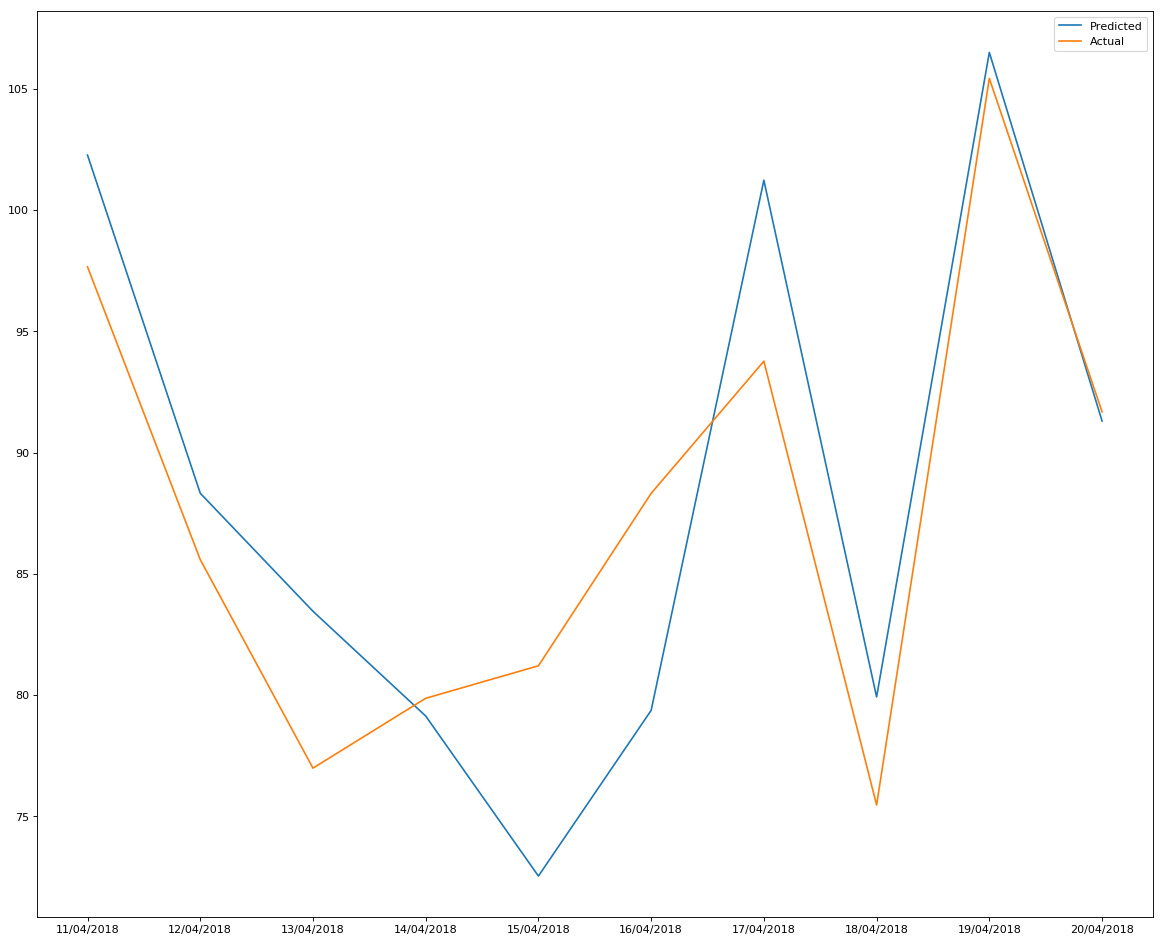

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
datelist = []
predictionlist = []
actuallist = []
for i in range(10):
    datelist.append(date['Date'][i])
    predictionlist.append(test_y_predictions[i][0])
    actuallist.append(test_y['AQI'][i])
    
plt.plot(datelist, predictionlist)
plt.plot(datelist, actuallist)
plt.legend(['Predicted', 'Actual'])
plt.show()

In [29]:
#training a new model on the same data to show the effect of increasing model capacity

#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')
#train model
model_mc.fit(train_X, train_y, epochs=300, callbacks=[early_stopping_monitor])

Epoch 1/300
1222/1222 [==============================] - 0s 290us/step - loss: 3678.1794
Epoch 2/300
1222/1222 [==============================] - 0s 55us/step - loss: 851.2106
Epoch 3/300
1222/1222 [==============================] - 0s 56us/step - loss: 544.1783
Epoch 4/300
 896/1222 [====================>.........] - ETA: 0s - loss: 363.9426

/home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1222/1222 [==============================] - 0s 69us/step - loss: 356.5874
Epoch 5/300
1222/1222 [==============================] - 0s 55us/step - loss: 312.9973
Epoch 6/300
1222/1222 [==============================] - 0s 65us/step - loss: 257.7359
Epoch 7/300
1222/1222 [==============================] - 0s 56us/step - loss: 194.1713
Epoch 8/300
1222/1222 [==============================] - 0s 59us/step - loss: 171.6646
Epoch 9/300
1222/1222 [==============================] - 0s 62us/step - loss: 166.8982
Epoch 10/300
1222/1222 [==============================] - 0s 76us/step - loss: 164.3164
Epoch 11/300
1222/1222 [==============================] - 0s 73us/step - loss: 148.7880
Epoch 12/300
1222/1222 [==============================] - 0s 75us/step - loss: 126.1065
Epoch 13/300
1222/1222 [==============================] - 0s 72us/step - loss: 136.3444
Epoch 14/300
1222/1222 [==============================] - 0s 60us/step - loss: 178.4783
Epoch 15/300
1222/1222 [==========================

1222/1222 [==============================] - 0s 81us/step - loss: 13.1134
Epoch 99/300
1222/1222 [==============================] - 0s 78us/step - loss: 10.8280
Epoch 100/300
1222/1222 [==============================] - 0s 76us/step - loss: 14.9137
Epoch 101/300
1222/1222 [==============================] - 0s 59us/step - loss: 19.6432
Epoch 102/300
1222/1222 [==============================] - 0s 54us/step - loss: 19.9478
Epoch 103/300
1222/1222 [==============================] - 0s 54us/step - loss: 19.8910
Epoch 104/300
1222/1222 [==============================] - 0s 54us/step - loss: 30.8038
Epoch 105/300
1222/1222 [==============================] - 0s 59us/step - loss: 26.9293
Epoch 106/300
1222/1222 [==============================] - 0s 61us/step - loss: 18.0118
Epoch 107/300
1222/1222 [==============================] - 0s 58us/step - loss: 21.5448
Epoch 108/300
1222/1222 [==============================] - 0s 56us/step - loss: 22.8371
Epoch 109/300
1222/1222 [======================

1222/1222 [==============================] - 0s 57us/step - loss: 12.2535
Epoch 192/300
1222/1222 [==============================] - 0s 60us/step - loss: 14.1288
Epoch 193/300
1222/1222 [==============================] - 0s 53us/step - loss: 13.1468
Epoch 194/300
1222/1222 [==============================] - 0s 54us/step - loss: 12.2991
Epoch 195/300
1222/1222 [==============================] - 0s 54us/step - loss: 11.5417
Epoch 196/300
1222/1222 [==============================] - 0s 54us/step - loss: 10.7165
Epoch 197/300
1222/1222 [==============================] - 0s 54us/step - loss: 18.2038
Epoch 198/300
1222/1222 [==============================] - 0s 56us/step - loss: 33.5169
Epoch 199/300
1222/1222 [==============================] - 0s 55us/step - loss: 22.8234
Epoch 200/300
1222/1222 [==============================] - 0s 57us/step - loss: 10.1225
Epoch 201/300
1222/1222 [==============================] - 0s 62us/step - loss: 24.4467
Epoch 202/300
1222/1222 [=====================

1222/1222 [==============================] - 0s 54us/step - loss: 4.3183
Epoch 285/300
1222/1222 [==============================] - 0s 56us/step - loss: 4.5414
Epoch 286/300
1222/1222 [==============================] - 0s 54us/step - loss: 3.4977
Epoch 287/300
1222/1222 [==============================] - 0s 58us/step - loss: 4.2669
Epoch 288/300
1222/1222 [==============================] - 0s 52us/step - loss: 12.3377
Epoch 289/300
1222/1222 [==============================] - 0s 58us/step - loss: 33.0645
Epoch 290/300
1222/1222 [==============================] - 0s 56us/step - loss: 39.1761
Epoch 291/300
1222/1222 [==============================] - 0s 56us/step - loss: 28.5730
Epoch 292/300
1222/1222 [==============================] - 0s 55us/step - loss: 15.2119
Epoch 293/300
1222/1222 [==============================] - 0s 54us/step - loss: 9.5889
Epoch 294/300
1222/1222 [==============================] - 0s 53us/step - loss: 11.3853
Epoch 295/300
1222/1222 [==========================

In [51]:
#example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
test_y_predictions = model_mc.predict(test_X)

In [52]:
l = []
for i in range(13):
    l.append(((test_y["AQI"][i] - test_y_predictions[i])/test_y["AQI"][i])*100)
    print(str(test_y["AQI"][i]) +" " + str(test_y_predictions[i]) + " " + str(l[i]))

788.9183673469389 [1943.4957] [-146.34941]
654.2379591836731 [341.8707] [47.74521]
592.5346938775509 [707.4289] [-19.390295]
618.759591836735 [632.4739] [-2.2164173]
568.1079591836731 [425.54623] [25.094128]
384.360506329114 [527.71716] [-37.297447]
399.310759493671 [576.8414] [-44.45926]
316.893720930233 [496.05096] [-56.535442]
486.69956521739095 [387.91635] [20.296547]
496.74304347826103 [387.51303] [21.989239]
782.881739130435 [772.85583] [1.2806377]
688.028260869565 [552.82166] [19.651316]
614.423913043478 [713.8517] [-16.18228]


In [53]:
l.sort(reverse = True) 
print(l)

[array([47.74521], dtype=float32), array([25.094128], dtype=float32), array([21.989239], dtype=float32), array([20.296547], dtype=float32), array([19.651316], dtype=float32), array([1.2806377], dtype=float32), array([-2.2164173], dtype=float32), array([-16.18228], dtype=float32), array([-19.390295], dtype=float32), array([-37.297447], dtype=float32), array([-44.45926], dtype=float32), array([-56.535442], dtype=float32), array([-146.34941], dtype=float32)]


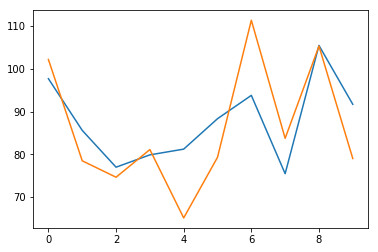

In [33]:
import matplotlib.pyplot as plt
import numpy as np
datelist = []
predictionlist = []
actuallist = []
for i in range(10):
    datelist.append(i)
    predictionlist.append(test_y_predictions[i][0])
    actuallist.append(test_y['AQI'][i])

plt.plot(datelist, actuallist)
plt.plot(datelist, predictionlist)
plt.show()